In [184]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import csv
import pickle

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Data Loading**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ***Information***
This radar data was collected by a system in Goose Bay, Labrador.  This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts.  See the paper for more details.  The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure  in the ionosphere.  "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number.  There were 17 pulse numbers for the Goose Bay system.  Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

In [236]:
dataSet = 'wpbc'
filePath = '/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/wpbc/'+dataSet+'.csv'
data = pd.read_csv(filePath)
data

,119513,N,31,18.02,27.6,117.5,1013,0.09489,0.1036,0.1086,...,139.7,1436,0.1195,0.1926,0.314,0.117,0.2677,0.08113,5,5.1
0,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
1,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
2,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
3,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
4,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,...,107.30,733.2,0.17060,0.4196,0.5999,0.17090,0.3485,0.11790,2.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
193,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
194,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
195,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


In [237]:
file = data
print("\nOriginal file:")
#print(file)

# adding header
headerList = ['Column_1', 'Column_2', 'Column_3', 'Column_4', 'Column_5', 'Column_6', 
             'Column_7', 'Column_8', 'Column_9', 'Column_10', 'Column_11', 'Column_12', 
             'Column_13', 'Column_14', 'Column_15', 'Column_16', 'Column_17', 'Column_18', 
             'Column_19', 'Column_20', 'Column_21', 'Column_22', 'Column_23', 'Column_24', 
             'Column_25', 'Column_26', 'Column_27', 'Column_28', 'Column_29', 'Column_30', 
             'Column_31', 'Column_32', 'Column_33', 'Column_34', 'Column_35']

# converting data frame to csv
file.to_csv("gfg2.csv", header=headerList, index=False)

# display modified csv file
file2 = pd.read_csv("gfg2.csv")
print('\nModified file:')
#print(file2)


Original file:

Modified file:


In [238]:
file2

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35
0,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
1,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
2,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
3,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
4,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,...,107.30,733.2,0.17060,0.4196,0.5999,0.17090,0.3485,0.11790,2.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
193,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
194,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
195,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


In [239]:
for i in range(len(file2)):
  if file2.iloc[i,1]=='N':
    file2.iloc[i,1] = 0.0
  else:
    file2.iloc[i,1] = 1.0
file2

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35
0,8423,0.0,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
1,842517,0.0,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
2,843483,0.0,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
3,843584,1.0,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
4,843786,1.0,77,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,...,107.30,733.2,0.17060,0.4196,0.5999,0.17090,0.3485,0.11790,2.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,942640,0.0,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
193,943471,0.0,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
194,94547,0.0,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
195,947204,1.0,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


In [240]:
file2['Column_35'] = pd.to_numeric(file2['Column_35'],errors='coerce')
file2['Column_2'] = pd.to_numeric(file2['Column_2'],errors='coerce')
file2

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35
0,8423,0.0,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.0
1,842517,0.0,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.0
2,843483,0.0,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.0
3,843584,1.0,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.0
4,843786,1.0,77,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,...,107.30,733.2,0.17060,0.4196,0.5999,0.17090,0.3485,0.11790,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,942640,0.0,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.0
193,943471,0.0,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0.0
194,94547,0.0,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0.0
195,947204,1.0,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,NaN


In [241]:
data = file2
data.dtypes

Column_1       int64
Column_2     float64
Column_3       int64
Column_4     float64
Column_5     float64
Column_6     float64
Column_7     float64
Column_8     float64
Column_9     float64
Column_10    float64
Column_11    float64
Column_12    float64
Column_13    float64
Column_14    float64
Column_15    float64
Column_16    float64
Column_17    float64
Column_18    float64
Column_19    float64
Column_20    float64
Column_21    float64
Column_22    float64
Column_23    float64
Column_24    float64
Column_25    float64
Column_26    float64
Column_27    float64
Column_28    float64
Column_29    float64
Column_30    float64
Column_31    float64
Column_32    float64
Column_33    float64
Column_34    float64
Column_35    float64
dtype: object

In [242]:
data = data.replace(np.nan,0.0)

In [243]:
data.shape

(197, 35)

In [171]:
# data.to_csv('./data2.csv',columns = ['Column_1', 'Column_3', 'Column_4', 'Column_5', 'Column_6', 
#              'Column_7', 'Column_8', 'Column_9', 'Column_10', 'Column_11', 'Column_12', 
#              'Column_13', 'Column_14', 'Column_15', 'Column_16', 'Column_17', 'Column_18', 
#              'Column_19', 'Column_20', 'Column_21', 'Column_22', 'Column_23', 'Column_24', 
#              'Column_25', 'Column_26', 'Column_27', 'Column_28', 'Column_29', 'Column_30', 
#              'Column_31', 'Column_32', 'Column_33', 'Column_34', 'Column_35', 'Column_2'])

In [244]:
data.iloc[3,3]

20.29

In [ ]:
# data = data.drop(['Name'], axis=1)

In [245]:
from random import shuffle
train, test= train_test_split(data, test_size=0.2, shuffle=True, random_state=42)
print(train.shape,test.shape)

(157, 35) (40, 35)


In [246]:
train.head()

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35
5,844359,0.0,60,18.98,19.61,124.40,1112.0,0.09087,0.12370,0.1213,...,152.60,1593.0,0.1144,0.3371,0.2990,0.1922,0.2726,0.09581,1.5,0.0
65,869691,0.0,43,11.80,16.58,78.99,432.0,0.10910,0.17000,0.1659,...,91.93,591.7,0.1385,0.4092,0.4504,0.1865,0.5774,0.10300,1.9,0.0
137,90291,0.0,57,14.60,23.29,93.97,664.7,0.08682,0.06636,0.0839,...,102.20,758.2,0.1312,0.1581,0.2675,0.1359,0.2477,0.06836,3.0,0.0
97,882061,0.0,67,20.51,27.81,134.40,1319.0,0.09159,0.10740,0.1554,...,162.70,1872.0,0.1223,0.2761,0.4146,0.1563,0.2437,0.08328,9.0,24.0
169,926424,0.0,28,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.2439,...,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,1.2,0.0


In [247]:
f1 = train.columns[0:1]
features=train.columns[2:]
Score=[]
features = features.append(f1)
features

Index(['Column_3', 'Column_4', 'Column_5', 'Column_6', 'Column_7', 'Column_8',
       'Column_9', 'Column_10', 'Column_11', 'Column_12', 'Column_13',
       'Column_14', 'Column_15', 'Column_16', 'Column_17', 'Column_18',
       'Column_19', 'Column_20', 'Column_21', 'Column_22', 'Column_23',
       'Column_24', 'Column_25', 'Column_26', 'Column_27', 'Column_28',
       'Column_29', 'Column_30', 'Column_31', 'Column_32', 'Column_33',
       'Column_34', 'Column_35', 'Column_1'],
      dtype='object')

In [248]:
X = data[features]
y = data['Column_2']
X

,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,...,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35,Column_1
0,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.0,8423
1,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,...,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.0,842517
2,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.0,843483
3,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.0,843584
4,77,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,0.07666,0.1995,...,733.2,0.17060,0.4196,0.5999,0.17090,0.3485,0.11790,2.5,0.0,843786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,...,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.0,942640
193,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,...,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0.0,943471
194,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,...,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0.0,94547
195,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,...,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,0.0,947204


# **Data Split (Major and Minor)**

In [249]:
for(Column_2), group in train.groupby(['Column_2']):
  group.to_csv(f'{Column_2}.csv', index=False)
# print(pd.read_csv("0.0.csv"))
# print(pd.read_csv("1.0.csv"))
train_zero = pd.read_csv("0.0.csv")
train_one = pd.read_csv("1.0.csv")
train_zero

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35
0,844359,0.0,60,18.98,19.61,124.40,1112.0,0.09087,0.12370,0.12130,...,152.60,1593.0,0.1144,0.3371,0.2990,0.1922,0.2726,0.09581,1.5,0.0
1,869691,0.0,43,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,...,91.93,591.7,0.1385,0.4092,0.4504,0.1865,0.5774,0.10300,1.9,0.0
2,90291,0.0,57,14.60,23.29,93.97,664.7,0.08682,0.06636,0.08390,...,102.20,758.2,0.1312,0.1581,0.2675,0.1359,0.2477,0.06836,3.0,0.0
3,882061,0.0,67,20.51,27.81,134.40,1319.0,0.09159,0.10740,0.15540,...,162.70,1872.0,0.1223,0.2761,0.4146,0.1563,0.2437,0.08328,9.0,24.0
4,926424,0.0,28,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,...,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,1.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,8712766,0.0,65,18.98,24.12,122.00,1030.0,0.11980,0.16120,0.21190,...,140.90,1328.0,0.1481,0.2397,0.3550,0.1638,0.3400,0.08003,2.0,2.0
114,887181,0.0,64,15.66,23.20,110.20,773.5,0.11090,0.31140,0.31760,...,143.70,1226.0,0.1504,0.5172,0.6181,0.2462,0.3277,0.10190,0.6,0.0
115,8811842,0.0,48,19.80,21.56,129.70,1230.0,0.09383,0.13060,0.12720,...,170.30,2009.0,0.1353,0.3235,0.3617,0.1820,0.3070,0.08255,2.6,0.0
116,935878,0.0,13,15.78,17.10,102.20,769.0,0.09668,0.09030,0.07268,...,111.70,921.4,0.1386,0.2640,0.2901,0.1234,0.3261,0.07752,0.8,0.0


In [250]:
train_one

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35
0,89539,1.0,78,16.27,20.71,106.90,813.7,0.11690,0.13190,0.14780,...,129.8,1121.0,0.1590,0.2947,0.3597,0.1583,0.3103,0.08200,2.5,2.0
1,847990,1.0,36,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,...,124.1,943.2,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,6.0,6.0
2,859223,1.0,19,12.68,23.84,82.69,499.0,0.11220,0.12620,0.11280,...,111.8,888.3,0.1851,0.4061,0.4024,0.1716,0.3383,0.10310,1.2,1.0
3,87112,1.0,44,17.68,20.74,117.40,963.7,0.11150,0.16650,0.18550,...,132.9,1302.0,0.1418,0.3498,0.3583,0.1515,0.2463,0.07738,9.0,7.0
4,91485,1.0,11,20.59,21.24,137.80,1320.0,0.10850,0.16440,0.21880,...,163.2,1760.0,0.1464,0.3597,0.5179,0.2113,0.2480,0.08999,5.5,20.0
5,857438,1.0,48,15.10,22.02,97.26,712.8,0.09056,0.07081,0.05253,...,117.7,1030.0,0.1389,0.2057,0.2712,0.1530,0.2675,0.07873,2.5,0.0
6,858986,1.0,34,14.25,22.15,96.42,645.7,0.10490,0.20080,0.21350,...,119.1,959.5,0.1640,0.6247,0.6922,0.1785,0.2844,0.11320,1.5,0.0
7,947204,1.0,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.3,2375.0,0.1498,0.4379,0.5411,0.2215,0.2832,0.08981,3.0,0.0
8,886490,1.0,19,19.55,28.77,133.60,1207.0,0.09260,0.20630,0.17840,...,178.6,1926.0,0.1281,0.5329,0.4251,0.1941,0.2818,0.10050,6.0,15.0
9,857010,1.0,8,18.65,17.60,123.70,1076.0,0.10990,0.16860,0.19740,...,150.6,1567.0,0.1679,0.5090,0.7345,0.2378,0.3799,0.09185,1.8,0.0


In [251]:
train_zero.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/wpbc/train_zero.csv')
train_one.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/wpbc/train_one.csv')


In [252]:
major_class = train_zero
minor_class = train_one

In [253]:
# before scaling the min and max values for both alcohol and malic acid are different 

minor_class.describe().T  


,count,mean,std,min,25%,50%,75%,max
Column_1,39.0,1.815996e+06,2.793317e+06,86208.000000,852122.500000,875263.000000,910849.500000,9.111805e+06
Column_2,39.0,1.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000e+00
Column_3,39.0,2.600000e+01,2.363205e+01,1.000000,9.000000,17.000000,38.000000,7.800000e+01
Column_4,39.0,1.844487e+01,3.463301e+00,12.340000,15.815000,19.000000,20.290000,2.722000e+01
Column_5,39.0,2.210179e+01,3.742074e+00,14.340000,20.050000,21.870000,24.540000,3.099000e+01
Column_6,39.0,1.220751e+02,2.356835e+01,81.150000,104.900000,123.700000,133.700000,1.821000e+02
Column_7,39.0,1.096228e+03,4.107597e+02,477.400000,800.950000,1104.000000,1289.500000,2.250000e+03
Column_8,39.0,1.038231e-01,1.013663e-02,0.082170,0.097615,0.104900,0.111750,1.215000e-01
Column_9,39.0,1.456005e-01,4.038058e-02,0.070810,0.123350,0.135300,0.167550,2.363000e-01
Column_10,39.0,1.665467e-01,6.099504e-02,0.052530,0.120250,0.166400,0.204350,3.368000e-01


In [254]:
major_class.describe().T

,count,mean,std,min,25%,50%,75%,max
Column_1,118.0,1.977791e+06,2.874097e+06,8423.000000,855698.750000,886339.000000,934213.000000,9.411300e+06
Column_2,118.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Column_3,118.0,5.179661e+01,3.497852e+01,1.000000,17.000000,51.000000,74.750000,1.250000e+02
Column_4,118.0,1.684237e+01,3.028926e+00,10.950000,14.712500,16.470000,19.130000,2.463000e+01
Column_5,118.0,2.226237e+01,4.374298e+00,10.380000,19.247500,21.595000,24.397500,3.928000e+01
Column_6,118.0,1.110764e+02,2.042976e+01,71.900000,95.735000,109.600000,124.775000,1.662000e+02
Column_7,118.0,9.044093e+02,3.244268e+02,361.600000,665.600000,843.950000,1123.250000,1.841000e+03
Column_8,118.0,1.030581e-01,1.320297e-02,0.075920,0.093995,0.101350,0.110900,1.447000e-01
Column_9,118.0,1.436609e-01,5.311967e-02,0.046050,0.110050,0.132700,0.174500,3.114000e-01
Column_10,118.0,1.539041e-01,7.251017e-02,0.023980,0.099955,0.149950,0.195300,4.268000e-01


# **Auto Encoder**

In [259]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 34  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(34,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation=None)(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(34, activation=None)(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [260]:
autoencoder.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 34)]              0         
                                                                 
 dense_10 (Dense)            (None, 34)                1190      
                                                                 
 dense_11 (Dense)            (None, 34)                1190      
                                                                 
Total params: 2,380
Trainable params: 2,380
Non-trainable params: 0
_________________________________________________________________


In [261]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [262]:
autoencoder.compile(optimizer='adam', loss='mse')

In [263]:
x_train = minor_class[features]
x_test = major_class[features]
y_train = minor_class['Column_2']
y_test = major_class['Column_2']

# **Data Scaling**

In [264]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()    # create an object of class

scaler.fit(x_train)       #  fit on training i/p data
x_train_scaled = scaler.transform(x_train)    # transform model on both traing and testing data

scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)


In [265]:
# convert the numpy array after transform into a dataframe
x_train_scaled = pd.DataFrame(x_train_scaled,columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)
#x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)


In [267]:
x_train.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/wpbc/x_train.csv')
x_test.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/wpbc/x_test.csv')
x_train_scaled.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/wpbc/x_train_scaled.csv')
x_test_scaled.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/wpbc/x_test_scaled.csv')


In [268]:
x_train.shape

(39, 34)

In [269]:
x_test.shape

(118, 34)

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
x_train_scaled

In [ ]:
x_test_scaled

In [274]:
autoencoder.fit(x_train_scaled, x_train_scaled,
                epochs=50,
                batch_size=8,
                shuffle=True,
                validation_data=(x_train_scaled, x_train_scaled))

Epoch 1/50
5/5 [==============================] - 0s 36ms/step - loss: 0.3144 - val_loss: 0.2665
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 0.2410 - val_loss: 0.2094
Epoch 3/50
5/5 [==============================] - 0s 11ms/step - loss: 0.1919 - val_loss: 0.1686
Epoch 4/50
5/5 [==============================] - 0s 10ms/step - loss: 0.1573 - val_loss: 0.1394
Epoch 5/50
5/5 [==============================] - 0s 7ms/step - loss: 0.1311 - val_loss: 0.1184
Epoch 6/50
5/5 [==============================] - 0s 7ms/step - loss: 0.1120 - val_loss: 0.1024
Epoch 7/50
5/5 [==============================] - 0s 11ms/step - loss: 0.0978 - val_loss: 0.0900
Epoch 8/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0867 - val_loss: 0.0799
Epoch 9/50
5/5 [==============================] - 0s 7ms/step - loss: 0.0768 - val_loss: 0.0723
Epoch 10/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0701 - val_loss: 0.0662
Epoch 11/50
5/5 [================

In [275]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test_scaled)
#decoded_imgs = decoder.predict(encoded_imgs)
encoded_imgs

4/4 [==============================] - 0s 2ms/step


array([[-0.22009963, -0.46832377, -0.03203131, ..., -0.00221069,
        -0.01449166,  0.11488779],
       [-0.0477756 ,  0.00652853, -0.10056986, ..., -0.0417424 ,
        -0.3710545 ,  0.13740717],
       [-0.0254131 , -0.04594761,  0.01065283, ..., -0.25497892,
        -0.22333851,  0.07881786],
       ...,
       [-0.18215057, -0.73082644, -0.37380147, ..., -0.17930754,
        -0.18128644, -0.22947066],
       [-0.08720655, -0.14542973,  0.02193965, ..., -0.02968726,
        -0.06406052,  0.05121261],
       [-0.07004339, -0.4352013 ,  0.09508072, ..., -0.19161999,
        -0.01305177,  0.23360366]], dtype=float32)

# **Euclidean Distance**

In [276]:
x_test_scaled_euclidean = x_test_scaled
x_test_scaled_euclidean.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/wpbc/x_test_scaled_euclidean.csv')
x_test_scaled_euclidean

,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,...,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35,Column_1
0,0.475806,0.586988,0.319377,0.556734,0.507233,0.217360,0.292632,0.241597,0.380286,0.305839,...,0.445380,0.230933,0.283891,0.239978,0.681433,0.228859,0.267414,0.114583,0.000000,0.088902
1,0.338710,0.062135,0.214533,0.075186,0.047587,0.482408,0.467119,0.352316,0.297639,1.000000,...,0.034320,0.402232,0.355512,0.372088,0.657634,0.829687,0.314574,0.156250,0.000000,0.091596
2,0.451613,0.266813,0.446713,0.234040,0.204880,0.158476,0.076540,0.148751,0.179114,0.232847,...,0.102673,0.350345,0.106080,0.212492,0.446370,0.179775,0.087367,0.270833,0.000000,0.008707
3,0.532258,0.698830,0.603114,0.662778,0.647154,0.227828,0.231204,0.326250,0.348775,0.102190,...,0.559916,0.287085,0.223296,0.340849,0.531544,0.171890,0.185229,0.895833,1.000000,0.092912
4,0.217742,0.775585,0.415571,0.743372,0.755306,0.510032,0.263237,0.545951,0.655592,0.305109,...,0.623548,0.420001,0.158927,0.337446,0.804184,0.097575,0.105667,0.083333,0.000000,0.097630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0.516129,0.586988,0.475433,0.531283,0.451805,0.637976,0.433955,0.466511,0.526231,0.778832,...,0.336590,0.470467,0.187138,0.288843,0.562858,0.361719,0.163912,0.166667,0.083333,0.925711
114,0.508065,0.344298,0.443599,0.406151,0.278424,0.508578,1.000000,0.728911,0.648958,0.866423,...,0.294717,0.486815,0.462794,0.518420,0.906893,0.337473,0.307359,0.020833,0.000000,0.093456
115,0.379032,0.646930,0.386851,0.612937,0.586995,0.260395,0.318636,0.256243,0.368180,0.573723,...,0.616158,0.379487,0.270381,0.294689,0.638846,0.296669,0.180441,0.229167,0.000000,0.936247
116,0.096774,0.353070,0.232526,0.321315,0.275382,0.301832,0.166761,0.120898,0.135110,0.424818,...,0.169670,0.402943,0.211277,0.232212,0.394180,0.334319,0.147449,0.041667,0.000000,0.098635


In [277]:
new_col = []
#print(len(x_test_scaled.iloc[0]))
for i in range(len(x_test_scaled)):
  tot = 0
  for j in range(len(x_test_scaled.iloc[i])):
    a = (x_test_scaled.iloc[i,j] - encoded_imgs[i][j])*(x_test_scaled.iloc[i,j] - encoded_imgs[i][j])
    tot = tot + a
  new_col.append(tot)
#print(len(new_col))
new_col

[9.031166879027968,
 12.868916686876739,
 4.116427155681166,
 15.189823642848506,
 18.438282254853334,
 11.885306733371577,
 4.122596995777053,
 8.73133449859381,
 7.305831742156681,
 6.215721707529531,
 9.197091379624291,
 7.237699782843812,
 14.624417251555913,
 10.740358982987846,
 9.791645731155022,
 14.310033538394404,
 2.1663231414091433,
 9.828734170287648,
 10.225652915620593,
 19.700516741400506,
 6.611352285718275,
 10.01700677509942,
 6.024922742818952,
 12.146359239030888,
 29.638993344727886,
 31.001346433879746,
 12.652082717331435,
 15.809276953631176,
 6.029341245791934,
 8.186690919342672,
 12.463517844576087,
 7.5227568270364005,
 12.91106288692959,
 8.129240114611303,
 7.7840168192560375,
 7.61389695506627,
 26.39611482419303,
 6.897126579394126,
 9.059610873738656,
 2.307077728571844,
 11.827833316336154,
 9.127149553406484,
 25.122946687871757,
 14.733562651865736,
 8.527069977456812,
 7.631342034962334,
 13.745518828879671,
 6.591540843919671,
 8.829438176600606,


In [278]:
x_test_scaled_euclidean['euclidean_distance'] = new_col
#x_test_scaled_euclidean = x_test_scaled_euclidean.drop(['Unnamed: 0'], axis=1)
x_test_scaled_euclidean.to_csv('x_test_scaled_euclidean.csv')
x_test_scaled_euclidean

,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,...,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35,Column_1,euclidean_distance
0,0.475806,0.586988,0.319377,0.556734,0.507233,0.217360,0.292632,0.241597,0.380286,0.305839,...,0.230933,0.283891,0.239978,0.681433,0.228859,0.267414,0.114583,0.000000,0.088902,9.031167
1,0.338710,0.062135,0.214533,0.075186,0.047587,0.482408,0.467119,0.352316,0.297639,1.000000,...,0.402232,0.355512,0.372088,0.657634,0.829687,0.314574,0.156250,0.000000,0.091596,12.868917
2,0.451613,0.266813,0.446713,0.234040,0.204880,0.158476,0.076540,0.148751,0.179114,0.232847,...,0.350345,0.106080,0.212492,0.446370,0.179775,0.087367,0.270833,0.000000,0.008707,4.116427
3,0.532258,0.698830,0.603114,0.662778,0.647154,0.227828,0.231204,0.326250,0.348775,0.102190,...,0.287085,0.223296,0.340849,0.531544,0.171890,0.185229,0.895833,1.000000,0.092912,15.189824
4,0.217742,0.775585,0.415571,0.743372,0.755306,0.510032,0.263237,0.545951,0.655592,0.305109,...,0.420001,0.158927,0.337446,0.804184,0.097575,0.105667,0.083333,0.000000,0.097630,18.438282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0.516129,0.586988,0.475433,0.531283,0.451805,0.637976,0.433955,0.466511,0.526231,0.778832,...,0.470467,0.187138,0.288843,0.562858,0.361719,0.163912,0.166667,0.083333,0.925711,17.440508
114,0.508065,0.344298,0.443599,0.406151,0.278424,0.508578,1.000000,0.728911,0.648958,0.866423,...,0.486815,0.462794,0.518420,0.906893,0.337473,0.307359,0.020833,0.000000,0.093456,22.817523
115,0.379032,0.646930,0.386851,0.612937,0.586995,0.260395,0.318636,0.256243,0.368180,0.573723,...,0.379487,0.270381,0.294689,0.638846,0.296669,0.180441,0.229167,0.000000,0.936247,17.201939
116,0.096774,0.353070,0.232526,0.321315,0.275382,0.301832,0.166761,0.120898,0.135110,0.424818,...,0.402943,0.211277,0.232212,0.394180,0.334319,0.147449,0.041667,0.000000,0.098635,3.661005


# **Sorting Data Based on Euclidean Distance**

In [280]:
# importing pandas package
import pandas as pandasForSortingCSV
# assign dataset
csvData = x_test_scaled_euclidean
# displaying unsorted data frame
print("\nBefore sorting:")
csvData
# sort data frame
csvData.sort_values(csvData.columns[34], axis=0, ascending=[False], inplace=True)
# displaying sorted data frame
print("\nAfter sorting:")
csvData


Before sorting:

After sorting:


,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,...,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35,Column_1,euclidean_distance
98,0.104839,0.972222,0.339792,1.000000,0.945924,1.000000,0.906915,1.000000,1.000000,0.983212,...,0.623285,0.370611,0.485437,0.817544,0.326631,0.164305,0.322917,0.000000,0.091142,46.228438
103,0.064516,0.881579,0.812803,0.900318,0.908071,0.578366,0.560580,0.680006,0.729117,0.358394,...,0.435639,0.236607,0.409871,0.759927,0.238321,0.133674,0.375000,0.000000,0.098885,33.729107
25,0.774194,0.628655,0.176817,0.594910,0.536974,0.464961,0.484831,0.524353,0.548897,0.954745,...,0.508138,0.285877,0.486833,0.797503,0.620737,0.276597,0.270833,0.000000,0.914849,31.001346
24,0.983871,0.034357,0.346021,0.060233,0.016561,0.968014,0.896363,0.539745,0.469291,0.940876,...,0.909020,0.809574,0.578454,0.954073,1.000000,0.773711,0.166667,0.000000,0.088809,29.638993
63,0.306452,1.000000,0.388235,0.992577,1.000000,0.393719,0.620124,0.513927,0.700923,0.498540,...,0.371668,0.365048,0.385526,0.912321,0.313818,0.273318,0.062500,0.041667,0.096694,27.447680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.096774,0.353070,0.232526,0.321315,0.275382,0.301832,0.166761,0.120898,0.135110,0.424818,...,0.402943,0.211277,0.232212,0.394180,0.334319,0.147449,0.041667,0.000000,0.098635,3.661005
79,0.096774,0.339912,0.567820,0.296394,0.269298,0.042600,0.023931,0.034258,0.046713,0.198540,...,0.197526,0.045833,0.089283,0.222245,0.244431,0.057327,0.166667,0.083333,0.098548,3.643242
75,0.491935,0.340643,0.311419,0.297985,0.268352,0.036057,0.038101,0.044958,0.045110,0.174453,...,0.188286,0.128530,0.176280,0.236692,0.220382,0.086908,0.166667,0.000000,0.093693,2.807660
39,0.072581,0.133041,0.418339,0.104136,0.097810,0.212707,0.043565,0.057420,0.037205,0.202190,...,0.426398,0.100319,0.169037,0.268548,0.249162,0.168110,0.062500,0.000000,0.091438,2.307078


# **NUS1 Data**

In [281]:
final_data_without_euclidean = csvData.iloc[0:len(minor_class)]
final_data_without_euclidean = final_data_without_euclidean.drop(['euclidean_distance'], axis=1)
final_data_without_euclidean

,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,...,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35,Column_1
98,0.104839,0.972222,0.339792,1.000000,0.945924,1.000000,0.906915,1.000000,1.000000,0.983212,...,0.642432,0.623285,0.370611,0.485437,0.817544,0.326631,0.164305,0.322917,0.000000,0.091142
103,0.064516,0.881579,0.812803,0.900318,0.908071,0.578366,0.560580,0.680006,0.729117,0.358394,...,0.809927,0.435639,0.236607,0.409871,0.759927,0.238321,0.133674,0.375000,0.000000,0.098885
25,0.774194,0.628655,0.176817,0.594910,0.536974,0.464961,0.484831,0.524353,0.548897,0.954745,...,0.461801,0.508138,0.285877,0.486833,0.797503,0.620737,0.276597,0.270833,0.000000,0.914849
24,0.983871,0.034357,0.346021,0.060233,0.016561,0.968014,0.896363,0.539745,0.469291,0.940876,...,0.024467,0.909020,0.809574,0.578454,0.954073,1.000000,0.773711,0.166667,0.000000,0.088809
63,0.306452,1.000000,0.388235,0.992577,1.000000,0.393719,0.620124,0.513927,0.700923,0.498540,...,0.876021,0.371668,0.365048,0.385526,0.912321,0.313818,0.273318,0.062500,0.041667,0.096694
36,0.661290,0.896199,0.574048,0.865323,0.884413,0.278715,0.460335,0.424557,0.571563,0.438686,...,1.000000,0.470467,0.358889,0.486920,0.961588,0.303174,0.208120,0.114583,0.041667,0.093011
42,0.483871,0.514620,0.000000,0.539767,0.432202,0.617621,0.872621,0.685467,0.700923,0.810949,...,0.620264,0.570687,0.610208,0.600269,0.987057,0.598462,0.418864,0.270833,0.083333,0.000000
72,0.080645,0.839912,0.589619,0.834571,0.772205,0.656877,0.611080,0.828956,0.906020,0.887591,...,0.484790,0.363139,0.205316,0.392768,0.770364,0.245220,0.053391,0.062500,0.000000,0.098824
81,0.604839,0.110380,0.472664,0.127996,0.077261,0.620529,0.729414,0.504742,0.359998,0.527007,...,0.083460,0.734878,1.000000,0.943282,0.801678,0.552139,1.000000,0.583333,0.833333,0.088971
56,0.685484,0.239035,0.440830,0.238282,0.167838,0.459145,0.735821,0.432253,0.253580,0.785401,...,0.104397,0.507428,0.875533,0.719726,0.618805,0.709836,0.587433,0.083333,0.000000,0.092146


In [282]:
data_with_nus1 = x_train_scaled
data_without_nus1 = x_train_scaled
data_with_nus1

,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,...,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35,Column_1
0,1.000000,0.264113,0.382583,0.255077,0.189721,0.883041,0.369146,0.335139,0.326285,0.466667,...,0.122342,0.685542,0.207158,0.257381,0.237321,0.340766,0.288154,0.244186,0.074074,0.000369
1,0.454545,0.147849,0.792793,0.154334,0.102336,0.806763,0.535924,0.391775,0.255128,0.930719,...,0.066250,0.791566,0.847144,0.936794,0.321196,0.809844,1.000000,0.651163,0.222222,0.084402
2,0.233766,0.022849,0.570571,0.015255,0.012185,0.763539,0.334703,0.212017,0.224044,0.410458,...,0.048931,1.000000,0.403561,0.341985,0.323797,0.458561,0.576445,0.093023,0.037037,0.085647
3,0.558442,0.358871,0.384384,0.359089,0.274343,0.745741,0.578222,0.467760,0.456191,0.496732,...,0.179443,0.478313,0.304302,0.254607,0.193108,0.071519,0.225031,1.000000,0.259259,0.000100
4,0.129870,0.554435,0.414414,0.561169,0.475347,0.669464,0.565533,0.584902,0.498607,0.335948,...,0.323932,0.533735,0.321756,0.570834,0.581925,0.078671,0.397322,0.593023,0.740741,0.000585
5,0.610390,0.185484,0.461261,0.159584,0.132799,0.213323,0.000000,0.000000,0.000000,0.032680,...,0.093634,0.443373,0.050247,0.082029,0.202861,0.160707,0.243476,0.244186,0.000000,0.085449
6,0.428571,0.128360,0.469069,0.151263,0.094945,0.577930,0.785486,0.566257,0.336731,0.467974,...,0.071393,0.745783,0.788963,0.916188,0.368661,0.231805,0.714442,0.127907,0.000000,0.085621
7,0.025974,0.610215,0.510511,0.632491,0.543044,0.631325,0.743791,0.652443,0.623322,0.383007,...,0.517951,0.574699,0.459626,0.616802,0.648244,0.226756,0.394863,0.302326,0.000000,0.095395
8,0.233766,0.484543,0.866667,0.519564,0.411599,0.265192,0.818720,0.442783,0.513168,0.394771,...,0.376301,0.313253,0.627116,0.386963,0.470091,0.220867,0.540921,0.651163,0.555556,0.088668
9,0.090909,0.424059,0.195796,0.421496,0.337696,0.705060,0.590912,0.509621,0.427703,0.413072,...,0.263045,0.792771,0.584979,1.000000,0.754226,0.633572,0.422735,0.162791,0.000000,0.085402


In [283]:
new_one = np.ones(len(final_data_without_euclidean))   #Adding target column in nus1
#final_data_without_euclidean
final_data_without_euclidean['target'] = new_one
#final_data_without_euclidean = final_data_without_euclidean.drop(['Unnamed: 0'], axis=1)
final_data_without_euclidean.to_csv('final_data_without_euclidean.csv')
final_data_without_euclidean

new_zero = np.zeros(len(data_with_nus1))      #Adding target column in minor class
data_with_nus1['target'] = new_zero
data_with_nus1.to_csv('data_with_nus1.csv')
data_with_nus1


#NUS1 data
nus1 = pd.concat(map(pd.read_csv, ['final_data_without_euclidean.csv', 'data_with_nus1.csv']), ignore_index=True)
nus1 = nus1.drop(['Unnamed: 0'], axis=1)
nus1.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/wpbc/nus1.csv')
nus1

,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,...,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35,Column_1,target
0,0.104839,0.972222,0.339792,1.000000,0.945924,1.000000,0.906915,1.000000,1.000000,0.983212,...,0.623285,0.370611,0.485437,0.817544,0.326631,0.164305,0.322917,0.000000,0.091142,1.0
1,0.064516,0.881579,0.812803,0.900318,0.908071,0.578366,0.560580,0.680006,0.729117,0.358394,...,0.435639,0.236607,0.409871,0.759927,0.238321,0.133674,0.375000,0.000000,0.098885,1.0
2,0.774194,0.628655,0.176817,0.594910,0.536974,0.464961,0.484831,0.524353,0.548897,0.954745,...,0.508138,0.285877,0.486833,0.797503,0.620737,0.276597,0.270833,0.000000,0.914849,1.0
3,0.983871,0.034357,0.346021,0.060233,0.016561,0.968014,0.896363,0.539745,0.469291,0.940876,...,0.909020,0.809574,0.578454,0.954073,1.000000,0.773711,0.166667,0.000000,0.088809,1.0
4,0.306452,1.000000,0.388235,0.992577,1.000000,0.393719,0.620124,0.513927,0.700923,0.498540,...,0.371668,0.365048,0.385526,0.912321,0.313818,0.273318,0.062500,0.041667,0.096694,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.038961,0.899866,0.187387,0.921743,0.864606,0.832189,1.000000,1.000000,1.000000,0.477124,...,0.613253,0.734309,0.822865,1.000000,0.587716,0.372182,0.476744,0.000000,0.090163,0.0
74,0.103896,0.487231,0.640240,0.461119,0.402572,0.534706,0.168590,0.397404,0.362687,0.094118,...,0.610843,0.012870,0.332673,0.161248,0.000000,0.000000,0.186047,0.259259,1.000000,0.0
75,0.207792,0.186828,0.140541,0.174641,0.134943,0.167557,0.151490,0.080803,0.047164,0.003922,...,0.566265,0.274859,0.203883,0.022107,0.472024,0.498565,0.127907,0.000000,0.087896,0.0
76,0.207792,1.000000,0.452252,1.000000,1.000000,0.692347,0.728685,0.825166,0.977842,0.273203,...,0.543373,0.398801,0.602734,0.955787,0.236853,0.272032,0.418605,0.148148,0.087239,0.0


# **Original Data (Without NUS1)**

In [284]:
final_data_org_without_euclidean = csvData
final_data_org_without_euclidean = final_data_org_without_euclidean.drop(['euclidean_distance'], axis=1)
final_data_org_without_euclidean

,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,...,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35,Column_1
98,0.104839,0.972222,0.339792,1.000000,0.945924,1.000000,0.906915,1.000000,1.000000,0.983212,...,0.642432,0.623285,0.370611,0.485437,0.817544,0.326631,0.164305,0.322917,0.000000,0.091142
103,0.064516,0.881579,0.812803,0.900318,0.908071,0.578366,0.560580,0.680006,0.729117,0.358394,...,0.809927,0.435639,0.236607,0.409871,0.759927,0.238321,0.133674,0.375000,0.000000,0.098885
25,0.774194,0.628655,0.176817,0.594910,0.536974,0.464961,0.484831,0.524353,0.548897,0.954745,...,0.461801,0.508138,0.285877,0.486833,0.797503,0.620737,0.276597,0.270833,0.000000,0.914849
24,0.983871,0.034357,0.346021,0.060233,0.016561,0.968014,0.896363,0.539745,0.469291,0.940876,...,0.024467,0.909020,0.809574,0.578454,0.954073,1.000000,0.773711,0.166667,0.000000,0.088809
63,0.306452,1.000000,0.388235,0.992577,1.000000,0.393719,0.620124,0.513927,0.700923,0.498540,...,0.876021,0.371668,0.365048,0.385526,0.912321,0.313818,0.273318,0.062500,0.041667,0.096694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.096774,0.353070,0.232526,0.321315,0.275382,0.301832,0.166761,0.120898,0.135110,0.424818,...,0.169670,0.402943,0.211277,0.232212,0.394180,0.334319,0.147449,0.041667,0.000000,0.098635
79,0.096774,0.339912,0.567820,0.296394,0.269298,0.042600,0.023931,0.034258,0.046713,0.198540,...,0.213022,0.197526,0.045833,0.089283,0.222245,0.244431,0.057327,0.166667,0.083333,0.098548
75,0.491935,0.340643,0.311419,0.297985,0.268352,0.036057,0.038101,0.044958,0.045110,0.174453,...,0.197258,0.188286,0.128530,0.176280,0.236692,0.220382,0.086908,0.166667,0.000000,0.093693
39,0.072581,0.133041,0.418339,0.104136,0.097810,0.212707,0.043565,0.057420,0.037205,0.202190,...,0.059732,0.426398,0.100319,0.169037,0.268548,0.249162,0.168110,0.062500,0.000000,0.091438


In [285]:
data_with_nus1_org = x_train_scaled
data_without_nus1_org = x_train_scaled
data_with_nus1_org

,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,...,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35,Column_1,target
0,1.000000,0.264113,0.382583,0.255077,0.189721,0.883041,0.369146,0.335139,0.326285,0.466667,...,0.685542,0.207158,0.257381,0.237321,0.340766,0.288154,0.244186,0.074074,0.000369,0.0
1,0.454545,0.147849,0.792793,0.154334,0.102336,0.806763,0.535924,0.391775,0.255128,0.930719,...,0.791566,0.847144,0.936794,0.321196,0.809844,1.000000,0.651163,0.222222,0.084402,0.0
2,0.233766,0.022849,0.570571,0.015255,0.012185,0.763539,0.334703,0.212017,0.224044,0.410458,...,1.000000,0.403561,0.341985,0.323797,0.458561,0.576445,0.093023,0.037037,0.085647,0.0
3,0.558442,0.358871,0.384384,0.359089,0.274343,0.745741,0.578222,0.467760,0.456191,0.496732,...,0.478313,0.304302,0.254607,0.193108,0.071519,0.225031,1.000000,0.259259,0.000100,0.0
4,0.129870,0.554435,0.414414,0.561169,0.475347,0.669464,0.565533,0.584902,0.498607,0.335948,...,0.533735,0.321756,0.570834,0.581925,0.078671,0.397322,0.593023,0.740741,0.000585,0.0
5,0.610390,0.185484,0.461261,0.159584,0.132799,0.213323,0.000000,0.000000,0.000000,0.032680,...,0.443373,0.050247,0.082029,0.202861,0.160707,0.243476,0.244186,0.000000,0.085449,0.0
6,0.428571,0.128360,0.469069,0.151263,0.094945,0.577930,0.785486,0.566257,0.336731,0.467974,...,0.745783,0.788963,0.916188,0.368661,0.231805,0.714442,0.127907,0.000000,0.085621,0.0
7,0.025974,0.610215,0.510511,0.632491,0.543044,0.631325,0.743791,0.652443,0.623322,0.383007,...,0.574699,0.459626,0.616802,0.648244,0.226756,0.394863,0.302326,0.000000,0.095395,0.0
8,0.233766,0.484543,0.866667,0.519564,0.411599,0.265192,0.818720,0.442783,0.513168,0.394771,...,0.313253,0.627116,0.386963,0.470091,0.220867,0.540921,0.651163,0.555556,0.088668,0.0
9,0.090909,0.424059,0.195796,0.421496,0.337696,0.705060,0.590912,0.509621,0.427703,0.413072,...,0.792771,0.584979,1.000000,0.754226,0.633572,0.422735,0.162791,0.000000,0.085402,0.0


In [286]:
new_one_org = np.ones(len(final_data_org_without_euclidean))   #Adding target column in nus1
#final_data_without_euclidean
final_data_org_without_euclidean['target'] = new_one_org
#final_data_without_euclidean = final_data_without_euclidean.drop(['Unnamed: 0'], axis=1)
final_data_org_without_euclidean.to_csv('final_data_org_without_euclidean.csv')
final_data_org_without_euclidean

new_zero_org = np.zeros(len(data_with_nus1_org))      #Adding target column in minor class
data_with_nus1_org['target'] = new_zero
data_with_nus1_org.to_csv('data_with_nus1_org.csv')
data_with_nus1_org


#NUS1 data
nus1_orgg = pd.concat(map(pd.read_csv, ['final_data_org_without_euclidean.csv', 'data_with_nus1_org.csv']), ignore_index=True)
nus1_orgg = nus1_orgg.drop(['Unnamed: 0'], axis=1)
nus1_orgg.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/wpbc/nus1_orgg.csv')
nus1_orgg

,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,...,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35,Column_1,target
0,0.104839,0.972222,0.339792,1.000000,0.945924,1.000000,0.906915,1.000000,1.000000,0.983212,...,0.623285,0.370611,0.485437,0.817544,0.326631,0.164305,0.322917,0.000000,0.091142,1.0
1,0.064516,0.881579,0.812803,0.900318,0.908071,0.578366,0.560580,0.680006,0.729117,0.358394,...,0.435639,0.236607,0.409871,0.759927,0.238321,0.133674,0.375000,0.000000,0.098885,1.0
2,0.774194,0.628655,0.176817,0.594910,0.536974,0.464961,0.484831,0.524353,0.548897,0.954745,...,0.508138,0.285877,0.486833,0.797503,0.620737,0.276597,0.270833,0.000000,0.914849,1.0
3,0.983871,0.034357,0.346021,0.060233,0.016561,0.968014,0.896363,0.539745,0.469291,0.940876,...,0.909020,0.809574,0.578454,0.954073,1.000000,0.773711,0.166667,0.000000,0.088809,1.0
4,0.306452,1.000000,0.388235,0.992577,1.000000,0.393719,0.620124,0.513927,0.700923,0.498540,...,0.371668,0.365048,0.385526,0.912321,0.313818,0.273318,0.062500,0.041667,0.096694,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.038961,0.899866,0.187387,0.921743,0.864606,0.832189,1.000000,1.000000,1.000000,0.477124,...,0.613253,0.734309,0.822865,1.000000,0.587716,0.372182,0.476744,0.000000,0.090163,0.0
153,0.103896,0.487231,0.640240,0.461119,0.402572,0.534706,0.168590,0.397404,0.362687,0.094118,...,0.610843,0.012870,0.332673,0.161248,0.000000,0.000000,0.186047,0.259259,1.000000,0.0
154,0.207792,0.186828,0.140541,0.174641,0.134943,0.167557,0.151490,0.080803,0.047164,0.003922,...,0.566265,0.274859,0.203883,0.022107,0.472024,0.498565,0.127907,0.000000,0.087896,0.0
155,0.207792,1.000000,0.452252,1.000000,1.000000,0.692347,0.728685,0.825166,0.977842,0.273203,...,0.543373,0.398801,0.602734,0.955787,0.236853,0.272032,0.418605,0.148148,0.087239,0.0


# **Test Data**

In [288]:
scaler.fit(test)
test_scaled = scaler.transform(test)
# convert the numpy array after transform into a dataframe
test_scaled = pd.DataFrame(test_scaled,columns = test.columns)
test_scaled.rename(columns = {'Column_2':'target'}, inplace = True)
test.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/wpbc/test.csv')
test_scaled.to_csv('/content/drive/MyDrive/October 2022/thesis/Gen_NUS1/wpbc/test_scaled.csv')
test_scaled

,Column_1,target,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,...,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35
0,0.087801,0.0,0.450000,0.493308,0.426142,0.441879,0.413003,0.564360,0.294259,0.272807,...,0.301748,0.235877,0.611902,0.396898,0.286336,0.542207,0.299231,0.372086,0.239130,0.111111
1,0.946347,1.0,0.016667,0.852772,0.442177,0.842477,0.835137,0.375320,0.597709,0.584103,...,0.833487,0.615554,0.340233,0.552021,0.675890,0.476667,0.211923,0.423483,0.184783,0.407407
2,0.082039,1.0,0.058333,0.796367,0.541788,0.705323,0.761583,0.380643,0.164011,0.240237,...,0.760810,0.700293,0.507115,0.219054,0.263641,0.559454,0.207692,0.230636,0.347826,0.037037
3,0.084407,0.0,0.416667,0.789675,0.713314,0.780011,0.682956,0.771338,1.000000,0.675550,...,0.655014,0.507337,0.623545,1.000000,0.827141,1.000000,0.698462,1.000000,0.347826,0.259259
4,0.088690,0.0,0.275000,0.369025,0.403790,0.296578,0.299628,0.000000,0.020461,0.010961,...,0.202392,0.138665,0.000000,0.269195,0.158247,0.000000,0.921154,0.244679,0.184783,0.000000
5,0.091358,0.0,0.058333,0.915870,0.877551,0.818034,0.866419,0.727972,0.476699,0.860011,...,0.820607,0.727806,0.313066,0.412097,0.681331,0.762972,0.171923,0.500652,0.021739,0.037037
6,0.925039,0.0,0.491667,0.998088,0.493197,0.907659,1.000000,0.185689,0.220821,0.311328,...,0.725851,0.622524,0.283312,0.373081,0.386911,0.725521,0.502692,0.471116,0.021739,0.111111
7,0.083499,1.0,0.266667,0.489484,0.394558,0.392993,0.404802,0.178395,0.002448,0.125082,...,0.219871,0.203595,0.081501,0.000000,0.122804,0.153403,1.000000,0.025771,0.239130,0.037037
8,0.082159,0.0,0.941667,0.412046,0.219145,0.417436,0.346212,0.860043,0.743199,0.594751,...,0.433303,0.276963,0.693402,0.430429,0.372144,0.826048,0.686154,0.674244,0.391304,0.037037
9,0.090100,0.0,0.141667,0.697897,0.794947,0.623846,0.640683,0.450030,0.169553,0.347656,...,0.457222,0.376009,0.203105,0.112817,0.272968,0.371705,0.111538,0.101926,0.021739,0.000000


In [289]:
#from random import shuffle
#nus1 = shuffle(nus1)
nus1 = nus1.sample(frac=1)
nus1

,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,...,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35,Column_1,target
21,0.250000,0.486111,0.448097,0.499470,0.418345,0.246729,0.581685,0.470731,0.441650,0.283212,...,0.275713,0.424351,0.429766,0.712329,0.145082,0.441821,0.062500,0.000000,0.968333,1.0
66,0.116883,0.566532,0.509910,0.557207,0.484373,0.537249,0.487582,0.391072,0.431502,0.273203,...,0.438554,0.411671,0.289083,0.431079,0.453513,0.213144,0.418605,0.074074,0.000000,0.0
38,0.556452,0.456871,0.489273,0.448568,0.383804,0.453329,0.516111,0.360508,0.326884,0.451825,...,0.544388,0.683517,0.552015,0.671830,0.344569,0.517250,0.479167,0.166667,0.090535,1.0
46,0.025974,0.610215,0.510511,0.632491,0.543044,0.631325,0.743791,0.652443,0.623322,0.383007,...,0.574699,0.459626,0.616802,0.648244,0.226756,0.394863,0.302326,0.000000,0.095395,0.0
12,0.129032,0.728801,0.508997,0.753977,0.666081,0.494039,0.669116,0.728415,0.702582,0.613869,...,0.417869,0.364849,0.554894,0.940295,0.268874,0.286567,0.114583,0.000000,0.097598,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,0.103896,0.452285,0.628829,0.467063,0.353492,0.219680,0.895462,0.556408,0.419537,0.939869,...,0.272289,1.000000,0.979592,0.828999,1.000000,0.586009,0.220930,0.000000,0.085248,0.0
72,0.194805,0.363575,0.822222,0.358098,0.284441,0.452581,0.366125,0.412530,0.313940,0.159477,...,0.457831,0.350846,0.812562,0.488947,0.285654,0.407706,0.127907,0.259259,0.999881,0.0
16,0.072581,0.845760,0.399308,0.795334,0.835068,0.000000,0.171735,0.110819,0.239704,0.306569,...,0.000000,0.080054,0.071220,0.270511,0.097773,0.018628,0.583333,0.083333,0.099354,1.0
43,0.129870,0.554435,0.414414,0.561169,0.475347,0.669464,0.565533,0.584902,0.498607,0.335948,...,0.533735,0.321756,0.570834,0.581925,0.078671,0.397322,0.593023,0.740741,0.000585,0.0


In [290]:
# nus1_org = nus1_org.sample(frac=1)
# nus1_org

nus1_orgg = nus1_orgg.sample(frac=1)
nus1_orgg

,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,...,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35,Column_1,target
48,0.129032,0.513889,0.469896,0.510074,0.428147,0.578366,0.481816,0.425550,0.561612,0.491241,...,0.370247,0.207899,0.251671,0.610872,0.232801,0.152565,0.218750,0.000000,0.098825,1.0
9,0.685484,0.239035,0.440830,0.238282,0.167838,0.459145,0.735821,0.432253,0.253580,0.785401,...,0.507428,0.875533,0.719726,0.618805,0.709836,0.587433,0.083333,0.000000,0.092146,1.0
155,0.207792,1.000000,0.452252,1.000000,1.000000,0.692347,0.728685,0.825166,0.977842,0.273203,...,0.543373,0.398801,0.602734,0.955787,0.236853,0.272032,0.418605,0.148148,0.087239,0.0
114,0.096774,0.339912,0.567820,0.296394,0.269298,0.042600,0.023931,0.034258,0.046713,0.198540,...,0.197526,0.045833,0.089283,0.222245,0.244431,0.057327,0.166667,0.083333,0.098548,1.0
27,0.532258,0.698830,0.603114,0.662778,0.647154,0.227828,0.231204,0.326250,0.348775,0.102190,...,0.287085,0.223296,0.340849,0.531544,0.171890,0.185229,0.895833,1.000000,0.092912,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,0.233871,0.312135,0.700346,0.334040,0.240165,0.419890,0.612964,0.573507,0.408978,0.598540,...,0.424977,0.735470,1.000000,0.862636,0.497536,0.563164,0.218750,0.000000,0.097545,1.0
142,0.506494,0.454301,0.717718,0.474988,0.369288,1.000000,0.654360,0.496605,0.718916,0.056209,...,0.446988,0.184238,0.026550,0.405072,0.007573,0.425195,0.302326,0.037037,0.944601,0.0
32,0.209677,0.523392,0.546367,0.496288,0.411383,0.330765,0.473149,0.480910,0.424954,0.551095,...,0.458384,0.458324,0.744682,0.965763,0.468362,0.250164,0.208333,0.083333,0.097797,1.0
37,0.927419,0.065058,0.287889,0.063945,0.053400,0.508578,0.397777,0.242838,0.174194,0.724818,...,0.581349,0.522693,0.586046,0.524446,0.630002,0.558573,0.270833,0.083333,0.089886,1.0


# **Classifier**

In [292]:
from sklearn.neighbors import KNeighborsClassifier
nus1_X_train = nus1[features]
nus1_y_train = nus1['target']

nus1_org_X_train = nus1_orgg[features]
nus1_org_y_train = nus1_orgg['target']

nus1_X_test = test_scaled[features]
nus1_y_test = test_scaled['target']

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(nus1_X_train, nus1_y_train)
print('NUS1 Data')
y_pred_nus1 = knn.predict(nus1_X_test)
print(y_pred_nus1)

#knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(nus1_org_X_train, nus1_org_y_train)
print('Without NUS1')
y_pred_org = knn.predict(nus1_X_test)
print(y_pred_org)

NUS1 Data
[0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]
Without NUS1
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.]


# **Confusion Matrix**

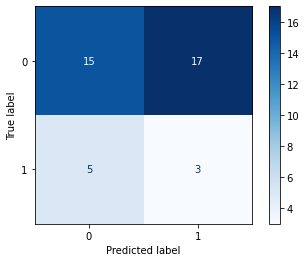

In [293]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

label = ["0", "1"]
cm = confusion_matrix(nus1_y_test, y_pred_nus1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [294]:
test_scaled.groupby('target').count()

,Column_1,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,...,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_33,Column_34,Column_35
target,,,,,,,,,,,,,,,,,,,,,
0.0,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
1.0,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


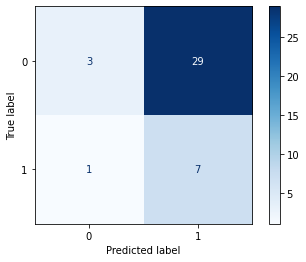

In [295]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

label = ["0", "1"]
cm = confusion_matrix(nus1_y_test, y_pred_org)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# **Accuracy**

In [296]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(nus1_X_train, nus1_y_train)
print('NUS1 Data')
print(knn.score(nus1_X_test, nus1_y_test))

#knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(nus1_org_X_train, nus1_org_y_train)
print('Without NUS!')
print(knn.score(nus1_X_test, nus1_y_test))

NUS1 Data
0.45
Without NUS!
0.25


# **Plot Results**

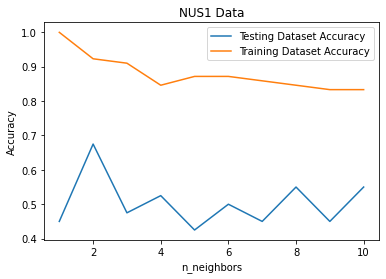

In [297]:
#NUS1 Data
neighbors = np.arange(1,11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(nus1_X_train, nus1_y_train)
  
  train_accuracy[i] = knn.score(nus1_X_train, nus1_y_train)
  test_accuracy[i] = knn.score(nus1_X_test, nus1_y_test)

plt.plot(neighbors, test_accuracy, label='Testing Dataset Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('NUS1 Data')
plt.show()

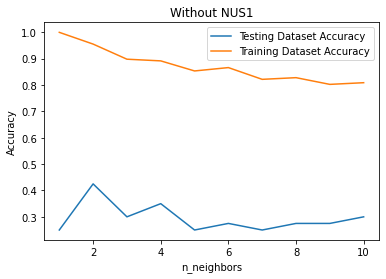

In [298]:
#Original Data (Without NUS1)
neighbors = np.arange(1,11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(nus1_org_X_train, nus1_org_y_train)
  
  train_accuracy[i] = knn.score(nus1_org_X_train, nus1_org_y_train)
  test_accuracy[i] = knn.score(nus1_X_test, nus1_y_test)

plt.plot(neighbors, test_accuracy, label='Testing Dataset Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('Without NUS1')
plt.show()